In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Statistical operations

## Statistical estimation and error bars
데이터 시각화에는 여러 데이터 요소를 평균 또는 중앙값과 같은 요약 통계로 축소하는 집계 또는 추정 단계가 포함되는 경우가 있습니다.  
요약 통계를 표시할 때는 일반적으로 오차 막대를 추가하여 요약이 기초 데이터 요소를 얼마나 잘 나타내는지에 대한 시각적 단서를 제공하는 것이 적절합니다.  

전체 데이터 집합이 주어지면 여러 가지 seaborn 함수가 요약 통계와 오차 막대를 자동으로 계산합니다.  
이 장에서는 오차 막대 제어법과 seaborn이 제공하는 각 옵션을 선택하는 이유에 대해 설명합니다. 

중심 경향 추정치 주변의 오차 막대는 추정치에 대한 불확실성의 범위 또는 추정치 주변의 기초 데이터의 확산이라는 두 가지 일반적인 사항 중 하나를 나타낼 수 있습니다. 이 두 측정값은 서로 관련이 있습니다.  
동일한 표본 크기가 주어지면 데이터의 확산이 더 넓을 때 추정치의 불확실성이 더 커집니다. 그러나 표본 크기가 커질수록 불확실성은 감소하는 반면, 확산은 감소하지 않습니다.

시본에서는 각 종류의 오차 막대를 구성하는 데 두 가지 접근 방식이 있습니다.  
1. 분포의 모양에 대한 가정에 의존하는 공식을 사용하는 모수적 방식
2. 사용자가 제공한 데이터만 사용하는 비모수적 방식

플롯의 일부로 추정을 수행하는 각 함수에 대해 존재하는 오차 막대 매개변수를 사용하여 선택할 수 있습니다.  
이 매개변수에는 사용할 메서드의 이름과 선택적으로 간격의 크기를 제어하는 매개변수를 사용할 수 있습니다.  
선택 사항은 표시되는 항목과 구성 방법에 따라 2D 분류체계로 정의할 수 있습니다:

spread - parametric : standard deviation `errorbar = ('sd', scale)`  
spread - non-parametric : Percentile interval `errorbar = ('pi', scale)`  
Uncertainty - parametric : Standard error `errorbar = ('se', scale)`  
Uncertainty - non-parametric : Confidence interval `errorbar = ('ci', scale)`  

크기 매개변수는 파라메트릭 접근 방식과 비파라메트릭 접근 방식에 따라 다르게 정의된다는 것을 알 수 있습니다.  
모수적 오차 막대 : 오차를 정의하는 통계(표준 오차 또는 표준 편차)를 곱한 스칼라 계수  
비모수적 오차 막대 : 백분위수 너비
아래에서 각 특정 접근 방식에 대해 자세히 설명합니다.

서로 다른 매개변수화를 비교하기 위해 다음 헬퍼 함수를 사용하겠습니다:  

In [14]:
def plot_errorbars(arg, **kws):
    np.random.seed(sum(map(ord, "error_bars")))
    x = np.random.normal(0, 1, 100)
    f, axs = plt.subplots(2, figsize=(7, 2), sharex=True, layout="tight")
    sns.pointplot(x=x, errorbar=arg, **kws, capsize=.3, ax=axs[0])
    sns.stripplot(x=x, jitter=.3, ax=axs[1])

## Measures of data spread
데이터 분포를 나타내는 오차 막대는 세 개의 숫자를 사용하여 분포를 간결하게 표시합니다.  
(boxplot(): 5개 이상의 숫자 사용, violinplot(): 복잡한 알고리즘 사용)  

**Standard deviation error bars**  
표준 편차는 익숙한 통계이므로 표준 편차 오차 막대가 가장 간단하게 설명할 수 있습니다.  
표준편차는 각 데이터 포인트에서 표본 평균까지의 평균 거리입니다.  
기본적으로 errorbar="sd"는 추정치 주위에 +/- 1σ의 오차 막대를 그리지만 스케일링 크기 매개변수를 전달하여 범위를 늘릴 수 있습니다.  
정규 분포 데이터라고 가정하면 데이터의 ~68%는 1표준편차 내에, ~95%는 2표준편차 내에, ~99.7%는 3표준편차 내에 놓이게 됩니다:

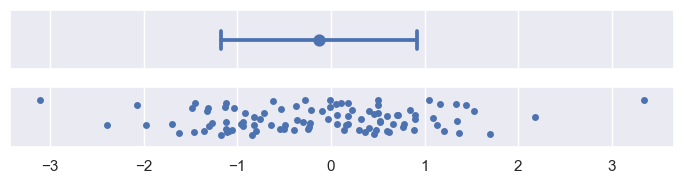

In [15]:
plot_errorbars("sd")

**Percentile interval error bars**
백분위수 구간은 데이터의 일부가 속하는 범위도 나타내지만, 샘플에서 직접 백분위수를 계산하여 표시합니다.  
기본적으로 errorbar="pi"는 2.5 백분위수에서 97.5 백분위수까지 95%의 구간을 표시합니다.  
예를 들어 사 분위수 간 범위를 표시하려면 크기 매개 변수를 전달하여 다른 범위를 선택할 수 있습니다:

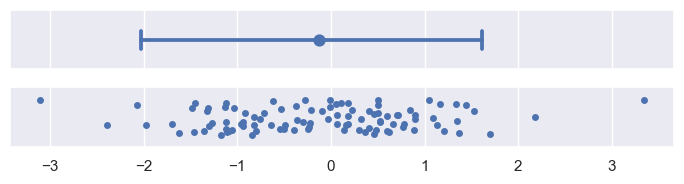

In [12]:
# scale 파라미터 없음
plot_errorbars("pi")

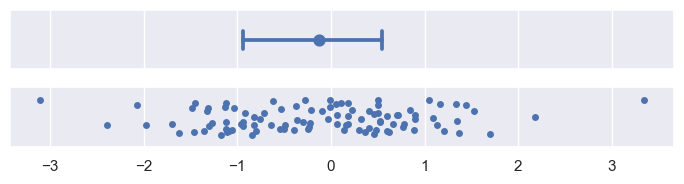

In [11]:
# scale 파라미터 입력
plot_errorbars(("pi", 50))

표준 편차 오차 막대는 항상 추정치를 중심으로 대칭을 이룹니다.  
이는 데이터가 왜곡된 경우, 특히 자연적인 한계가 있는 경우(예: 데이터가 양수만 가능한 수량을 나타내는 경우) 문제가 될 수 있습니다.  
경우에 따라 표준편차 오차 막대가 "불가능한" 값까지 확장될 수 있습니다.  
비모수적 접근 방식은 비대칭적 확산을 설명할 수 있고 데이터 범위를 벗어나지 않기 때문에 이러한 문제가 없습니다.